# Identifying Vacant Parcels

This program will use building footprints from OpenStreetMaps and Parcel boundaries from the official data portals to identify parcels that are mostly vacant.

In [1]:
import osmnx as ox
from IPython.display import Image
%matplotlib inline
ox.config(log_console=True, use_cache=True)

import pandas as pd, numpy as np
from shapely.geometry import Polygon
from shapely.geometry import Point
import geopandas

import matplotlib.pyplot as plt

## First Step: Import all the data

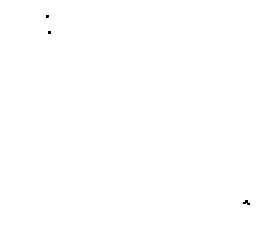

In [2]:
footprints = geopandas.read_file('case_studies/all_build.shp')

f, ax = plt.subplots(1, figsize=(4, 4))
ax = footprints.plot(ax = ax, color='white', edgecolor='black', linewidth=1)
ax.set_axis_off()
plt.show()

In [3]:
footprints['footprint'] = 'footprint'
footprints = footprints.iloc[:,102:104]

footprints.head(2)

,geometry,footprint
0,"POLYGON ((-122.2266035 37.7757013, -122.226657...",footprint
1,"POLYGON ((-122.2209957 37.7735694, -122.220091...",footprint


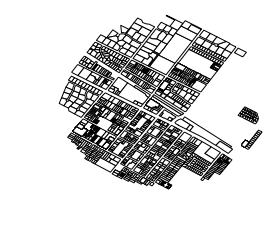

In [4]:
fruit_pz = geopandas.read_file('GIS/Parcel_Zoning/Subset/fruit_res.shp')
mp_pz = geopandas.read_file('GIS/Parcel_Zoning/Subset/mp_res.shp')
soto_pz = geopandas.read_file('GIS/Parcel_Zoning/Subset/soto_res.shp')
#wv_pz = geopandas.read_file('GIS/Parcel_Zoning/Subset/wv_res.shp')
sl_pz = geopandas.read_file('GIS/Parcel_Zoning/Subset/sl_res.shp')

f, ax = plt.subplots(1, figsize=(4, 4))
ax = mp_pz.plot(ax = ax, color='white', edgecolor='black', linewidth=1)
ax.set_axis_off()
plt.show()

In [5]:
sl_pz = sl_pz[sl_pz['dist_stati'] <= 402.336]

In [6]:
soto_pz.columns

Index(['level_0', 'index', 'arb', 'assetid', 'block', 'bpp', 'cncl_dist',
       'date_crtn_', 'time_crtn_', 'eng_dist', 'eng_dist_d', 'id', 'lot',
       'date_lst_m', 'time_lst_m', 'map_ref', 'mapsheet', 'mod', 'pin', 'pind',
       'shape_area', 'shape_leng', 'tract', 'key', 'name', 'lat', 'lon',
       'index_righ', 'zone_cmplt', 'zone_base', 'dist_stati', 'parcel_are',
       'parcel_len', 'parcel_quo', 'geometry'],
      dtype='object')

In [7]:
soto_pz2 = soto_pz[['assetid', 'bpp', 'id','lot','shape_area','zone_cmplt','zone_base','dist_stati','parcel_are','geometry']]
sl_pz2 = sl_pz[['assetid', 'bpp', 'id','lot','shape_area','zone_cmplt','zone_base','dist_stati','parcel_are','geometry']]

soto_pz2.head(3)

,assetid,bpp,id,lot,shape_area,zone_cmplt,zone_base,dist_stati,parcel_are,geometry
0,1475921.0,5175027003,331.0,23,5433.818538,R2-1-CUGU,Multi-Family Residential,798.989183,5455.762698,POLYGON ((-118.2104603343075 34.05096083937416...
1,1475938.0,5175017010,332.0,10,5495.704778,R2-1-CUGU,Multi-Family Residential,799.633580,5517.906385,"POLYGON ((-118.2094280859165 34.0507960205358,..."
2,1476094.0,5175027019,336.0,38,5187.663818,R2-1-CUGU,Multi-Family Residential,795.926899,5208.608658,POLYGON ((-118.2105268789543 34.05085647001695...


In [8]:
soto_pz_agg = soto_pz2.dissolve(by='bpp', aggfunc='sum')
sl_pz_agg = sl_pz2.dissolve(by='bpp', aggfunc='sum')

soto_pz_agg['bpp'] = soto_pz_agg.index
sl_pz_agg['bpp'] = sl_pz_agg.index

sl_pz_agg.head(2)

,geometry,assetid,id,shape_area,dist_stati,parcel_are,bpp
bpp,,,,,,,
5420005001,POLYGON ((-118.2548220158466 34.09115749236824...,1361413.0,361.0,3664.845801,278.807241,3679.361451,5420005001
5420005002,POLYGON ((-118.2548220158466 34.09115749236824...,1361672.0,366.0,2748.873929,287.895697,2759.762397,5420005002


In [9]:
print(len(soto_pz))
print(len(soto_pz_agg))

print(len(sl_pz))
print(len(sl_pz_agg))

2355
1857
733
580


## Now to overlay footprints onto parcels to see building coverage

In [10]:
print(footprints.crs)
print(fruit_pz.crs)

{'init': 'epsg:4269'}
{'init': 'epsg:4269'}


In [11]:
fruit_union = geopandas.overlay(fruit_pz, footprints, how='union')
mp_union = geopandas.overlay(mp_pz, footprints, how='union')
soto_union = geopandas.overlay(soto_pz_agg, footprints, how='union')
#wv_union = geopandas.overlay(wv_pz, footprints, how='union')
sl_union = geopandas.overlay(sl_pz_agg, footprints, how='union')

In [12]:
fruit_union.head(6)

,index,apn,apn_sort,book,centroid_x,centroid_y,clca_categ,comments,date_creat,date_updat,...,BASEZONE,OVERLAY,ZNLABEL,zone_base,dist_stati,parcel_are,parcel_len,parcel_quo,footprint,geometry
0,5.0,33-2127-11,033 212701100,33,6.064269e+06,2.111500e+06,None,None,2004-06-07,2004-06-07,...,RM-3,None,RM-3,Multi-Family Residential,756.169981,3804.304088,303.358662,0.519485,footprint,POLYGON ((-122.2210739764544 37.78114214709127...
1,1227.0,33-2127-12,033 212701200,33,6.064281e+06,2.111528e+06,None,None,2004-06-07,2004-06-07,...,RM-3,None,RM-3,Multi-Family Residential,765.265877,3358.252702,295.922028,0.481914,footprint,POLYGON ((-122.2210131355776 37.78121670210592...
2,5.0,33-2127-11,033 212701100,33,6.064269e+06,2.111500e+06,None,None,2004-06-07,2004-06-07,...,RM-3,None,RM-3,Multi-Family Residential,756.169981,3804.304088,303.358662,0.519485,footprint,"POLYGON ((-122.2211203 37.7812422, -122.221156..."
3,5.0,33-2127-11,033 212701100,33,6.064269e+06,2.111500e+06,None,None,2004-06-07,2004-06-07,...,RM-3,None,RM-3,Multi-Family Residential,756.169981,3804.304088,303.358662,0.519485,footprint,POLYGON ((-122.2213594422117 37.78123212563791...
4,5.0,33-2127-11,033 212701100,33,6.064269e+06,2.111500e+06,None,None,2004-06-07,2004-06-07,...,RM-3,None,RM-3,Multi-Family Residential,756.169981,3804.304088,303.358662,0.519485,footprint,"POLYGON ((-122.221311494389 37.78131074177877,..."
5,1227.0,33-2127-12,033 212701200,33,6.064281e+06,2.111528e+06,None,None,2004-06-07,2004-06-07,...,RM-3,None,RM-3,Multi-Family Residential,765.265877,3358.252702,295.922028,0.481914,footprint,POLYGON ((-122.2212197072613 37.78128181140656...


In [13]:
mtc_crs = '+proj=utm +zone=10 +ellps=GRS80 +datum=NAD83 +units=m +no_defs '
fruit_union = fruit_union.to_crs(mtc_crs)
mp_union = mp_union.to_crs(mtc_crs)
soto_union = soto_union.to_crs(mtc_crs)
#wv_union = wv_union.to_crs(mtc_crs)
sl_union = sl_union.to_crs(mtc_crs)

fruit_union['vacant_area'] = fruit_union['geometry'].area * 10.7639
mp_union['vacant_area'] = mp_union['geometry'].area * 10.7639
soto_union['vacant_area'] = soto_union['geometry'].area * 10.7639
#wv_union['vacant_area'] = wv_union['geometry'].area * 10.7639
sl_union['vacant_area'] = sl_union['geometry'].area * 10.7639

fruit_union['lot_coverage'] = (fruit_union['parcel_are'] - fruit_union['vacant_area']) / fruit_union['parcel_are']
mp_union['lot_coverage'] = (mp_union['parcel_are'] - mp_union['vacant_area']) / mp_union['parcel_are']
soto_union['lot_coverage'] = (soto_union['parcel_are'] - soto_union['vacant_area']) / soto_union['parcel_are']
#wv_union['lot_coverage'] = (wv_union['parcel_are'] - wv_union['vacant_area']) / wv_union['parcel_are']
sl_union['lot_coverage'] = (sl_union['parcel_are'] - sl_union['vacant_area']) / sl_union['parcel_are']

fruit_unbuilt = fruit_union[fruit_union['footprint'].isna()]
mp_unbuilt = mp_union[mp_union['footprint'].isna()]
#wv_unbuilt = wv_union[wv_union['footprint'].isna()]
soto_unbuilt = soto_union[soto_union['footprint'].isna()]
sl_unbuilt = sl_union[sl_union['footprint'].isna()]

sl_unbuilt.head(3)

,assetid,id,shape_area,dist_stati,parcel_are,bpp,footprint,geometry,vacant_area,lot_coverage
1013,1361413.0,361.0,3664.845801,278.807241,3679.361451,5420005001,NaN,"POLYGON ((937925.5685653682 3782441.808271136,...",2324.596738,0.368206
1014,1361672.0,366.0,2748.873929,287.895697,2759.762397,5420005002,NaN,"POLYGON ((937925.5685653682 3782441.808271136,...",2662.226304,0.035342
1015,1361854.0,371.0,2750.166690,296.150198,2761.060969,5420005003,NaN,"POLYGON ((937938.0221822975 3782436.094877359,...",1901.975421,0.311143


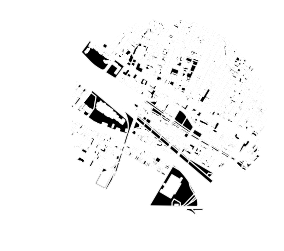

In [14]:
f, ax = plt.subplots(1, figsize=(4, 4))
ax = fruit_unbuilt.plot(ax = ax, color='black', edgecolor='white', linewidth=1)
ax.set_axis_off()
plt.show()

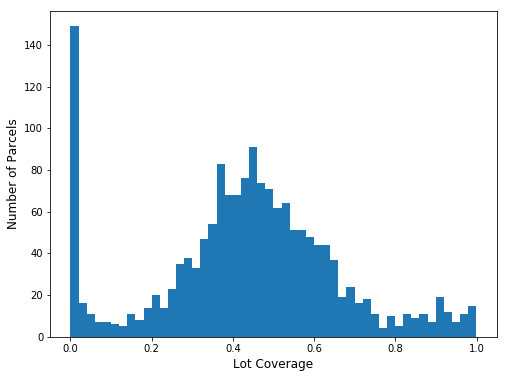

In [15]:
plt.figure(1, figsize=(8,6), )
plt.xlabel('Lot Coverage', fontsize=12)
plt.ylabel('Number of Parcels', fontsize=12)
ax = plt.hist(fruit_unbuilt['lot_coverage'], bins=50)
#plt.savefig('parcel_area_hist.png')
plt.show()

#### Exclude small parcels since these may be throwing off the results

#### Also drop the duplicates for Menlo Park since they are also likely throwing off the results

I'll define small parcels as less than 1,000 sq ft

In [16]:
fruit_unbuilt = fruit_unbuilt[fruit_unbuilt['parcel_are'] > 1000]
mp_unbuilt = mp_unbuilt[mp_unbuilt['parcel_are'] > 1000].drop_duplicates('PARCEL_ID')
#wv_unbuilt = wv_unbuilt[wv_unbuilt['parcel_are'] > 1000]
soto_unbuilt = soto_unbuilt[soto_unbuilt['parcel_are'] > 1000]
sl_unbuilt = sl_unbuilt[sl_unbuilt['parcel_are'] > 1000]

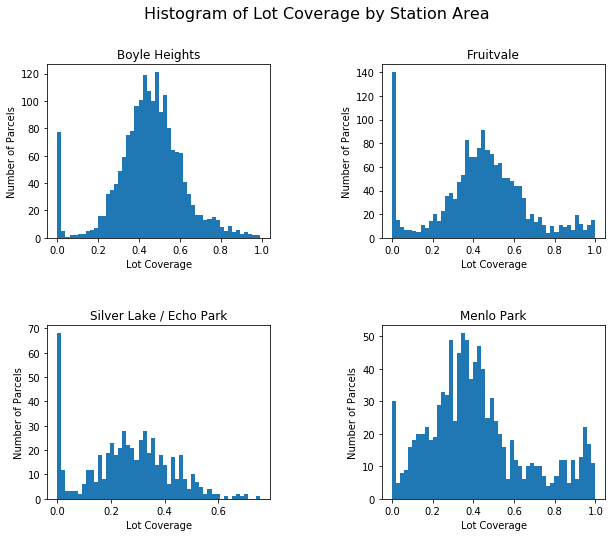

In [17]:
plt.figure(1, figsize=(10,8), )
plt.suptitle("Histogram of Lot Coverage by Station Area", fontsize=16)

ax = plt.subplot(222)
ax.set_title("Fruitvale")
ax.set_xlabel('Lot Coverage', fontsize=10)
ax.set_ylabel('Number of Parcels', fontsize=10)
#ax.set_xlim(0,20000)
ax.hist(fruit_unbuilt['lot_coverage'], bins=50)

ax = plt.subplot(224)
ax.set_title("Menlo Park")
ax.set_xlabel('Lot Coverage', fontsize=10)
ax.set_ylabel('Number of Parcels', fontsize=10)
#ax.set_xlim(0,20000)
ax.hist(mp_unbuilt['lot_coverage'], bins=50)

ax = plt.subplot(221)
ax.set_title("Boyle Heights")
ax.set_xlabel('Lot Coverage', fontsize=10)
ax.set_ylabel('Number of Parcels', fontsize=10)
#ax.set_xlim(0,20000)
ax.hist(soto_unbuilt['lot_coverage'], bins=50)

#ax = plt.subplot(323)
#ax.set_title("Wilshire / Vermont Station")
#ax.set_xlabel('Lot Coverage', fontsize=10)
#ax.set_ylabel('Number of Parcels', fontsize=10)
#ax.set_xlim(0,20000)
#ax.hist(wv_unbuilt['lot_coverage'], bins=50)

ax = plt.subplot(223)
ax.set_title("Silver Lake / Echo Park")
ax.set_xlabel('Lot Coverage', fontsize=10)
ax.set_ylabel('Number of Parcels', fontsize=10)
#ax.set_xlim(0,20000)
ax.hist(sl_unbuilt['lot_coverage'], bins=50)

plt.subplots_adjust(wspace=.5, hspace=.5)
plt.savefig('lot_coverage_hist.png')
plt.show()

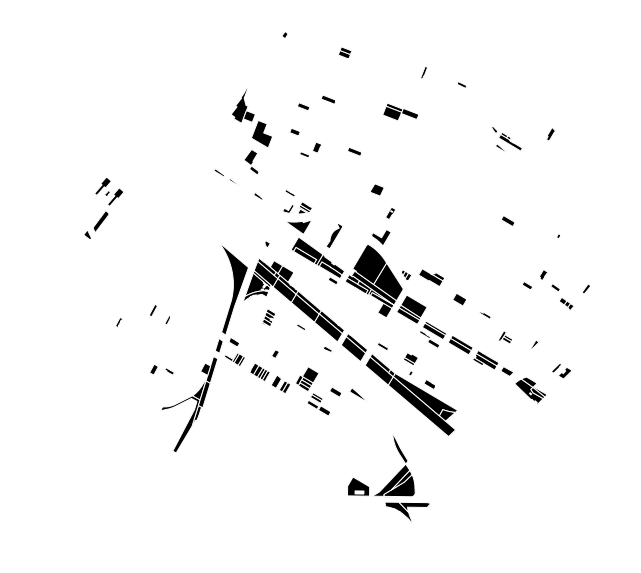

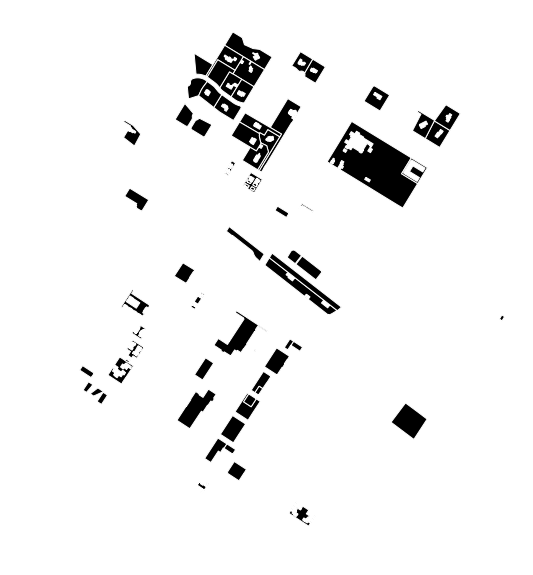

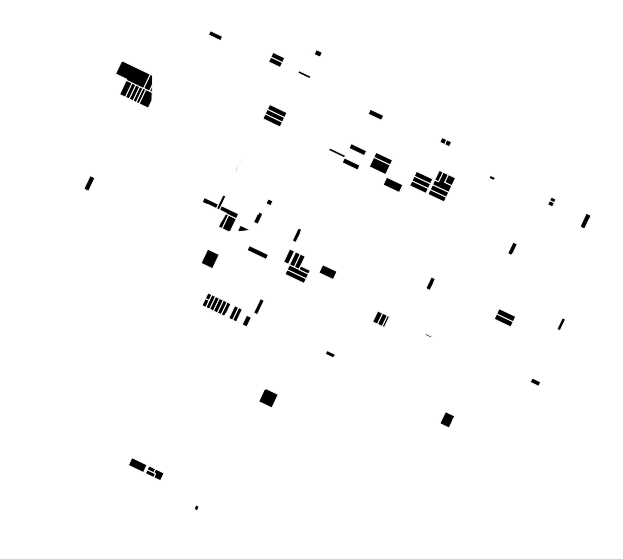

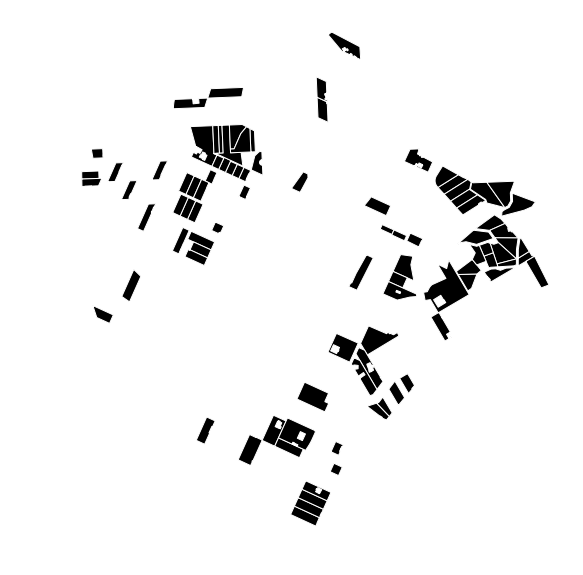

In [18]:
f, ax = plt.subplots(1, figsize=(10, 10))
ax = fruit_unbuilt[fruit_unbuilt['lot_coverage'] < 0.1].plot(ax = ax, color='black', edgecolor='white', linewidth=1)
ax.set_axis_off()
plt.savefig('fruit_vacant.png')

f, ax = plt.subplots(1, figsize=(10, 10))
ax = mp_unbuilt[mp_unbuilt['lot_coverage'] < 0.1].plot(ax = ax, color='black', edgecolor='white', linewidth=1)
ax.set_axis_off()
plt.savefig('mp_vacant.png')

f, ax = plt.subplots(1, figsize=(10, 10))
ax = soto_unbuilt[soto_unbuilt['lot_coverage'] < 0.1].plot(ax = ax, color='black', edgecolor='white', linewidth=1)
ax.set_axis_off()
plt.savefig('soto_vacant.png')

f, ax = plt.subplots(1, figsize=(10, 10))
ax = sl_unbuilt[sl_unbuilt['lot_coverage'] < 0.1].plot(ax = ax, color='black', edgecolor='white', linewidth=1)
ax.set_axis_off()
plt.savefig('sl_vacant.png')


In [19]:
mp_unbuilt[mp_unbuilt['APN'] ==  '061382170']

,index,APAGE,APN,APN_FLAG,BLOCK,BOOK,LOT,SBE_NO,SUBLOT,PARCEL_ID,...,gpz_z_labe,zone_base,dist_stati,parcel_are,parcel_len,parcel_quo,footprint,geometry,vacant_area,lot_coverage
2629,631.0,38,061382170,V,2,061,17,None,0,231311.0,...,R2,Multi-Family Residential,471.687584,477623.183783,3032.735066,0.65257,NaN,"POLYGON ((572524.0644991868 4146155.813137799,...",431555.169985,0.096453


In [20]:
mp_unbuilt[mp_unbuilt['APN'] ==  '061370030']

,index,APAGE,APN,APN_FLAG,BLOCK,BOOK,LOT,SBE_NO,SUBLOT,PARCEL_ID,...,gpz_z_labe,zone_base,dist_stati,parcel_are,parcel_len,parcel_quo,footprint,geometry,vacant_area,lot_coverage
2541,274.0,37,061370030,V,0,061,03,None,0,2316.0,...,RE,Single-Family Residential,550.87346,418052.186206,2682.159159,0.730251,NaN,(POLYGON ((572529.6302637407 4146247.971681739...,362752.536592,0.132279


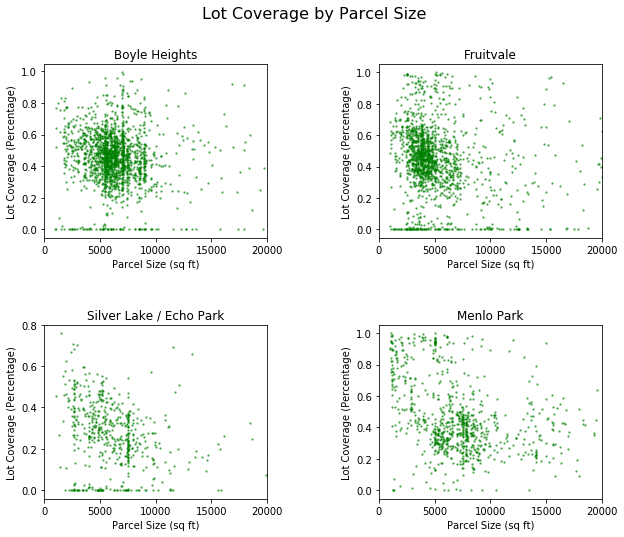

In [21]:
plt.figure(1, figsize=(10,8), )
plt.suptitle("Lot Coverage by Parcel Size", fontsize=16)

ax = plt.subplot(222)
ax.set_title("Fruitvale")
ax.set_xlabel('Parcel Size (sq ft)', fontsize=10)
ax.set_ylabel('Lot Coverage (Percentage)', fontsize=10)
ax.set_xlim(0,20000)
ax.scatter(fruit_unbuilt['parcel_are'], fruit_unbuilt['lot_coverage'], color='g', alpha=.5, edgecolor='g', s=2)

ax = plt.subplot(224)
ax.set_title("Menlo Park")
ax.set_xlabel('Parcel Size (sq ft)', fontsize=10)
ax.set_ylabel('Lot Coverage (Percentage)', fontsize=10)
ax.set_xlim(0,20000)
ax.scatter(mp_unbuilt['parcel_are'], mp_unbuilt['lot_coverage'], color='g', alpha=.5, edgecolor='g', s=2)

ax = plt.subplot(221)
ax.set_title("Boyle Heights")
ax.set_xlabel('Parcel Size (sq ft)', fontsize=10)
ax.set_ylabel('Lot Coverage (Percentage)', fontsize=10)
ax.set_xlim(0,20000)
ax.scatter(soto_unbuilt['parcel_are'], soto_unbuilt['lot_coverage'], color='g', alpha=.5, edgecolor='g', s=2)

ax = plt.subplot(223)
ax.set_title("Silver Lake / Echo Park")
ax.set_xlabel('Parcel Size (sq ft)', fontsize=10)
ax.set_ylabel('Lot Coverage (Percentage)', fontsize=10)
ax.set_xlim(0,20000)
ax.scatter(sl_unbuilt['parcel_are'], sl_unbuilt['lot_coverage'], color='g', alpha=.5, edgecolor='g', s=2)

plt.subplots_adjust(wspace=.5, hspace=.5)
#plt.savefig('lot_coverage_hist.png')
plt.show()

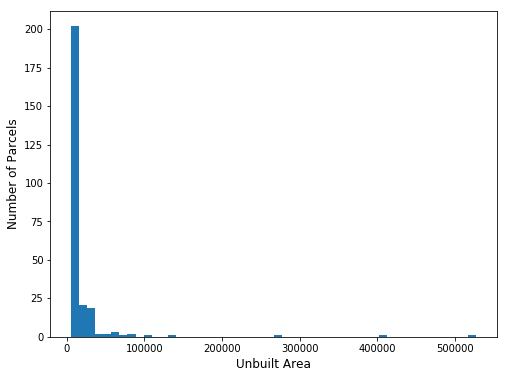

In [22]:
plt.figure(1, figsize=(8,6), )
plt.xlabel('Unbuilt Area', fontsize=12)
plt.ylabel('Number of Parcels', fontsize=12)
#plt.xlim(0,20000)
ax = plt.hist(fruit_unbuilt[fruit_unbuilt['vacant_area']>5000]['vacant_area'], bins=50)
#plt.savefig('parcel_area_hist.png')
plt.show()

In [23]:
print("fruitvale",fruit_pz.shape)
print("menlo park",mp_pz.drop_duplicates('PARCEL_ID').shape)
print("soto",soto_pz_agg.shape)
print("silver lake",sl_pz_agg.shape)

fruitvale (1647, 28)
menlo park (1021, 38)
soto (1857, 7)
silver lake (580, 7)


In [24]:

print("fruitvale",fruit_unbuilt[fruit_unbuilt['vacant_area']>5000].shape)
print("menlo park",mp_unbuilt[mp_unbuilt['vacant_area']>5000].shape)
print("soto",soto_unbuilt[soto_unbuilt['vacant_area']>5000].shape)
print("silver lake",sl_unbuilt[sl_unbuilt['vacant_area']>5000].shape)

fruitvale (257, 31)
menlo park (430, 41)
soto (297, 10)
silver lake (213, 10)


In [25]:

print("fruitvale",fruit_unbuilt[fruit_unbuilt['parcel_are']>5000].shape)
print("menlo park",mp_unbuilt[mp_unbuilt['parcel_are']>5000].shape)
print("soto",soto_unbuilt[soto_unbuilt['parcel_are']>5000].shape)
print("silver lake",sl_unbuilt[sl_unbuilt['parcel_are']>5000].shape)

fruitvale (583, 31)
menlo park (785, 41)
soto (1462, 10)
silver lake (351, 10)


In [26]:
print("fruitvale",fruit_unbuilt[fruit_unbuilt['vacant_area']>5000]['vacant_area'].sum())
print("menlo park",mp_unbuilt[mp_unbuilt['vacant_area']>5000]['vacant_area'].sum())
print("soto",soto_unbuilt[soto_unbuilt['vacant_area']>5000]['vacant_area'].sum())
print("silver lake",sl_unbuilt[sl_unbuilt['vacant_area']>5000]['vacant_area'].sum())

fruitvale 4727590.670471567
menlo park 8041888.048318962
soto 2396853.161533689
silver lake 1587440.2644828963


In [27]:
print("fruitvale",fruit_unbuilt[fruit_unbuilt['parcel_are']>5000]['parcel_are'].sum())
print("menlo park",mp_unbuilt[mp_unbuilt['parcel_are']>5000]['parcel_are'].sum())
print("soto",soto_unbuilt[soto_unbuilt['parcel_are']>5000]['parcel_are'].sum())
print("silver lake",sl_unbuilt[sl_unbuilt['parcel_are']>5000]['parcel_are'].sum())

fruitvale 8840806.201110933
menlo park 12893840.62674183
soto 11116242.174586816
silver lake 2770253.3256163104
